In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/ml-1m'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(1000209, 20)

In [5]:
df.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [6]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [7]:
df_train.head().T

,648724,203881,243394,788507,301066
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [8]:
df_train.shape,df_valid.shape

((900188, 20), (100021, 20))

### Add the autoencoder features

In [9]:
import pickle

In [10]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [11]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [12]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.131411      -1.867321      -1.034773      -0.652261   
 1         1       1.066437      -0.769391       1.397299      -0.614779   
 2         2       0.164834      -0.302516      -0.110159       1.606218   
 3         3       0.376587      -0.299099       0.583110      -0.180737   
 4         4       0.122414       0.068338      -1.488121      -0.774750   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -1.801149      -1.348989      -2.631876       0.922943       1.640687   
 1      -2.255088       0.802201       0.277280       1.107929       0.140370   
 2       1.272078      -0.461646       0.396851      -0.093426      -0.577105   
 3      -0.767343       1.249731       0.616019       0.303022      -0.390305   
 4       1.677763      -1.009944      -1.013061      -1.366796       1.194140   
 
    user_au

In [13]:
df_valid_user_autoenc.shape, type(df_valid_user_autoenc),df_valid_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0       0.765422      -2.367885      -1.498335      -0.990351   
 1         1       1.729839      -1.087505       2.130423      -0.620454   
 2         2       1.692085      -1.186405      -0.182575      -1.131373   
 3         3       0.424285      -1.634102       0.503540      -0.238155   
 4         4      -0.619118      -1.506441       0.454649       0.529628   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -1.362897      -1.182127      -2.561123      -0.025844       2.447920   
 1      -2.465815       1.752788       0.676629       1.051027      -0.007495   
 2      -0.217210       0.156759      -0.648247      -0.612643       0.567780   
 3      -1.858348       0.457126      -0.449041       1.081136       0.219433   
 4      -0.408142      -0.652889      -0.868575       1.113766       1.353852   
 
    user_au

In [14]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -0.987196       3.786223      -4.627895       2.953091   
 1         1       2.333298       0.309642      -1.113329       7.204848   
 2         2       0.514841       2.356029      -1.666602       2.984127   
 3         3       4.477022       3.657685       2.977721       9.806198   
 4         4      -2.124246      -0.325668      -5.257163      -3.279461   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       2.233420       3.987140       1.304113       3.130350      -0.694784   
 1       1.855779      -0.591763      -4.000251      -2.140112       3.453243   
 2      -1.919637      -2.581110      -2.085017       0.172845       2.633548   
 3       2.379490      -3.766197      -2.888726      -2.900762       3.767788   
 4       0.463391       4.090149       0.852403       4.013878      -3.601570   
 
    ...  it

In [15]:
df_valid_item_autoenc.shape, type(df_valid_item_autoenc),df_valid_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0       1.027555       3.701517      -2.389572       3.427757   
 1         1       0.953807       1.917872       0.203470       6.683481   
 2         2       1.404702       3.326656      -2.060753       4.571496   
 3         3       0.943444       2.427817       0.614833       5.357132   
 4         4      -1.720551       1.583389      -3.461987      -0.479422   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       3.551548       2.606306       0.160117       1.820890      -0.322413   
 1       1.475014      -0.065162      -2.388873      -2.260431       2.067212   
 2      -0.882935      -1.504650       0.607969       0.441256       2.842574   
 3       2.420052       0.307918       0.887766       1.488334      -0.621205   
 4       2.280066       2.764338      -3.085567       1.328660      -3.530811   
 
    ...  it

In [16]:
df_valid_user_autoenc.isnull().any()

user_idx         False
user_autoenc0    False
user_autoenc1    False
user_autoenc2    False
user_autoenc3    False
user_autoenc4    False
user_autoenc5    False
user_autoenc6    False
user_autoenc7    False
user_autoenc8    False
user_autoenc9    False
dtype: bool

In [17]:
df_valid.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [18]:
df_train.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [19]:
df_train.shape, df_valid.shape

((900188, 20), (100021, 20))

In [20]:
df_train.dtypes

userId                  int64
itemId                  int64
rating                  int64
timestamp               int64
gender                 object
age                     int64
occupation              int64
zip                    object
title                  object
genre                  object
random_dstype          object
user_idx                int64
item_idx                int64
dstype_random_train     int64
dstype_random_valid     int64
gender_idx              int64
age_idx                 int64
title_idx               int64
genre_idx               int64
zip_idx                 int64
dtype: object

In [21]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [22]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='item_idx',how='left')

In [23]:
df_train.shape

(900188, 45)

In [24]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='item_idx',how='left')
df_valid.shape

(100021, 20)


(100021, 45)

In [25]:
df_valid.shape

(100021, 45)

In [26]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='user_idx',how='left')
df_valid.shape

(100021, 45)


(100021, 55)

In [27]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='user_idx',how='left')
df_train.shape

(900188, 45)


(900188, 55)

In [28]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [29]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [30]:
autoenc_cols=autoenc_cols.tolist()

In [31]:
autoenc_cols

['item_autoenc0',
 'item_autoenc1',
 'item_autoenc2',
 'item_autoenc3',
 'item_autoenc4',
 'item_autoenc5',
 'item_autoenc6',
 'item_autoenc7',
 'item_autoenc8',
 'item_autoenc9',
 'item_autoenc10',
 'item_autoenc11',
 'item_autoenc12',
 'item_autoenc13',
 'item_autoenc14',
 'item_autoenc15',
 'item_autoenc16',
 'item_autoenc17',
 'item_autoenc18',
 'item_autoenc19',
 'item_autoenc20',
 'item_autoenc21',
 'item_autoenc22',
 'item_autoenc23',
 'item_autoenc24',
 'user_autoenc0',
 'user_autoenc1',
 'user_autoenc2',
 'user_autoenc3',
 'user_autoenc4',
 'user_autoenc5',
 'user_autoenc6',
 'user_autoenc7',
 'user_autoenc8',
 'user_autoenc9']

In [32]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,1.066437,-0.769391,1.397299,-0.614779,-2.255088,0.802201,0.277280,1.107929,0.140370,0.511113
1,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,0.164834,-0.302516,-0.110159,1.606218,1.272078,-0.461646,0.396851,-0.093426,-0.577105,0.313789
2,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,0.376587,-0.299099,0.583110,-0.180737,-0.767343,1.249731,0.616019,0.303022,-0.390305,0.327489
3,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,0.122414,0.068338,-1.488121,-0.774750,1.677763,-1.009944,-1.013061,-1.366796,1.194140,-1.049694
4,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,-0.251530,-0.066663,-0.172782,0.291469,-0.312681,-0.236875,0.071298,0.166090,0.058171,0.057417


In [33]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,2.333298,0.309642,-1.113329,7.204848,1.855779,-0.591763,-4.000251,-2.140112,...,1.066437,-0.769391,1.397299,-0.614779,-2.255088,0.802201,0.277280,1.107929,0.140370,0.511113
1,2,2,0.514841,2.356029,-1.666602,2.984127,-1.919637,-2.581110,-2.085017,0.172845,...,0.164834,-0.302516,-0.110159,1.606218,1.272078,-0.461646,0.396851,-0.093426,-0.577105,0.313789
2,3,3,4.477022,3.657685,2.977721,9.806198,2.379490,-3.766197,-2.888726,-2.900762,...,0.376587,-0.299099,0.583110,-0.180737,-0.767343,1.249731,0.616019,0.303022,-0.390305,0.327489
3,4,4,-2.124246,-0.325668,-5.257163,-3.279461,0.463391,4.090149,0.852403,4.013878,...,0.122414,0.068338,-1.488121,-0.774750,1.677763,-1.009944,-1.013061,-1.366796,1.194140,-1.049694
4,5,5,1.128772,2.336243,-3.422875,2.346029,-0.664875,-0.545030,0.999951,2.278310,...,-0.251530,-0.066663,-0.172782,0.291469,-0.312681,-0.236875,0.071298,0.166090,0.058171,0.057417


In [34]:
df_valid['rating'].describe(),df_train['rating'].describe()

(count    100021.000000
 mean          3.584587
 std           1.114938
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64, count    900188.000000
 mean          3.581229
 std           1.117342
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64)

In [35]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [36]:
emb_cols=['gender_idx','age_idx','title_idx','genre_idx','zip_idx']

In [37]:
[(col, df_train[col].nunique()) for col in emb_cols]

[('gender_idx', 2),
 ('age_idx', 7),
 ('title_idx', 3692),
 ('genre_idx', 301),
 ('zip_idx', 3439)]

In [38]:
[(col, min(50,df_train[col].nunique()//100)) for col in emb_cols]

[('gender_idx', 0),
 ('age_idx', 0),
 ('title_idx', 36),
 ('genre_idx', 3),
 ('zip_idx', 34)]

### Dataset and DataLoader

In [39]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [40]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols],df_valid['rating'],autoenc_cols)

In [41]:
df_train.shape

(900188, 55)

In [75]:
bs=128

In [76]:
dltrain=DataLoader(dstrain,bs,True)

In [77]:
dlvalid=DataLoader(dsvalid,bs,True)

In [78]:
610/10, 9724/25

(61.0, 388.96)

In [79]:
len(user_to_idx),len(movie_to_idx)

(6040, 3706)

## Model Architecture

In [47]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)
n_emb_user=120
n_emb_movie=120
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.1
hidden=[50,15,10]
dropouts=[0.2,0.3,0.2]

In [48]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [97]:
#[mtx_user_emb,mtx_item_emb,user_bias_emb,item_bias_emb]=pickle.load(open(f'{DATAPATH}/wts_embs','rb'))
pretrain_wts=pickle.load(open(f'{DATAPATH}/wts_embs','rb'))

In [132]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,autoenc_cols,pretrain_wts,\
                 dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse"):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_item,self.n_items,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.create_architecture()
        
        self.emb_user.weight.data=torch.FloatTensor(pretrain_wts[0])
        self.emb_item.weight.data=torch.FloatTensor(pretrain_wts[1])
        self.ub.weight.data=torch.FloatTensor(pretrain_wts[2])
        self.ib.weight.data=torch.FloatTensor(pretrain_wts[3])

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_item=nn.Embedding(self.n_items+1,self.n_emb_item)
        self.ub=nn.Embedding(self.n_users+1,1)
        self.ib=nn.Embedding(self.n_items+1,1)
        
        
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_item,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin_bias=nn.Linear(3,1)
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1]+1,self.hidden[2]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_item.weight.dat)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_item(items))
        users_bias=self.emb_dropout(self.ub(Xb[:,0].long()))
        items_bias=self.emb_dropout(self.ib(Xb[:,1].long()))
        embed=torch.cat([users,items],1)
        out1=self.lin1(embed)
        bias=torch.cat([users_bias,items_bias,users_bias+items_bias],1)
        biased=self.lin_bias(bias)
           
        
        denses=Xb[:,2:]
        out2=self.lin2(denses)
        
        out3=torch.cat([out1,out2,biased],1)
        
        out4=self.lin3(out3)
        
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [133]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")

In [134]:
cfobj

cf(
  (emb_user): Embedding(6041, 120)
  (emb_item): Embedding(3707, 120)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=240, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=66, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [135]:
for Xb, Yb in dltrain:
    break

In [136]:
Xb.shape, Yb.shape

(torch.Size([128, 37]), torch.Size([128, 1]))

In [137]:
Xb.dtype

torch.float32

In [138]:
cfobj.forward(Xb,Yb)

(tensor([[2.8456],
         [3.0496],
         [3.3622],
         [3.2605],
         [2.9329],
         [2.9687],
         [3.0277],
         [3.4570],
         [2.9335],
         [3.2163],
         [3.0238],
         [3.1426],
         [3.2603],
         [3.2616],
         [3.2753],
         [2.8684],
         [3.0935],
         [2.8748],
         [3.1614],
         [3.0882],
         [3.0931],
         [2.7177],
         [3.1195],
         [3.2323],
         [2.9924],
         [3.0559],
         [3.0968],
         [2.9045],
         [2.8867],
         [3.0174],
         [3.3181],
         [2.9527],
         [3.1031],
         [3.1235],
         [3.3647],
         [2.8644],
         [3.0004],
         [3.2065],
         [3.0299],
         [3.0055],
         [3.1135],
         [3.0675],
         [3.0235],
         [2.9192],
         [3.1340],
         [2.9881],
         [3.1250],
         [2.9703],
         [3.4500],
         [3.0930],
         [3.3267],
         [3.1767],
         [2.

## Learner

In [183]:
device

'cuda:1'

In [140]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
   
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [141]:
device='cuda:1'

In [142]:
del cfobj

In [143]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")

In [144]:
cfobj=cfobj.to(device)

In [145]:
cfobj

cf(
  (emb_user): Embedding(6041, 120)
  (emb_item): Embedding(3707, 120)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=240, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=66, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [146]:
len(dltrain)

7033

In [147]:
dltrain.batch_size

128

In [148]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)


In [149]:
learner=Learner(cfobj,optimizer,None,device,0,2000,0.25,cycle_mult=0,error_type="mse")

In [150]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

Batch:2000 1.0072208345532416  
Batch:4000 0.9294348954856396  
Batch:6000 0.9272040300170581  


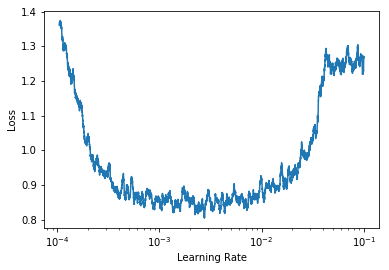

In [151]:
learner.plot_lrs(50)

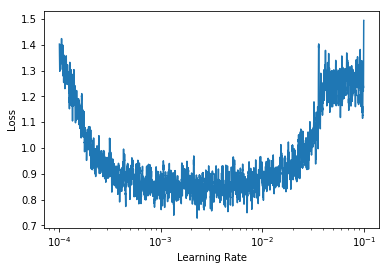

In [152]:
learner.plot_lrs(10)

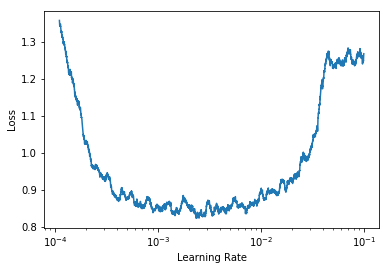

In [153]:
learner.plot_lrs(100)

In [171]:
del cfobj
torch.cuda.empty_cache()

In [173]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")
cfobj=cfobj.to(device)

In [174]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=4e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [175]:
cfobj.emb_user.weight.requires_grad=False
cfobj.emb_item.weight.requires_grad=False
cfobj.ib.weight.requires_grad=False
cfobj.ub.weight.requires_grad=False

In [176]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.9004153077724087                 Valid Loss:0.8219728681742383 Train RMSE:0.9461920289770362 Valid RMSE:0.9045506402337069 Train MSE:0.9004153077724087 Valid MSE:0.8219728681742383                 Train MAE:0.7577253223719814 Valid MAE:0.7194055258617986
Epoch:1 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.8584019094684394                 Valid Loss:0.8168506081146962 Train RMSE:0.9245905903930937 Valid RMSE:0.901715633719445 Train MSE:0.8584019094684394 Valid MSE:0.8168506081146962                 Train MAE:0.7377297196112976 Valid MAE:0.7167078386944579
Epoch:2 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.8546577182769368                 Valid Loss:0.8145745446157577 Train RMSE:0.9224996935183322 Valid RMSE:0.9006156819919549 Train MSE:0.8546577182769368 Valid MSE:0.8145745446157577                 Train MAE:0.7362089523224307 Valid MAE:0.7157386715912148
Epoch:3 Learning rate 0.0004 Weight Decay 1e-07 Train

In [177]:
cfobj.emb_user.weight.requires_grad=True
cfobj.emb_item.weight.requires_grad=True
cfobj.ib.weight.requires_grad=True
cfobj.ub.weight.requires_grad=True

In [178]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.8227631546483852                 Valid Loss:0.7637472738466604 Train RMSE:0.9050632993770867 Valid RMSE:0.8719340070050349 Train MSE:0.8227631546483852 Valid MSE:0.7637472738466604                 Train MAE:0.7201072932662622 Valid MAE:0.6913255737413226
Epoch:1 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.7755798069135438                 Valid Loss:0.7507890482692767 Train RMSE:0.8787283547908191 Valid RMSE:0.8643540670680444 Train MSE:0.7755798069135438 Valid MSE:0.7507890482692767                 Train MAE:0.6964778150872114 Valid MAE:0.6825630840895426
Epoch:2 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.7511494279492551                 Valid Loss:0.7452623167306262 Train RMSE:0.8647000318284862 Valid RMSE:0.8611038402745929 Train MSE:0.7511494279492551 Valid MSE:0.7452623167306262                 Train MAE:0.6842916072576022 Valid MAE:0.6787921844998284
Epoch:3 Learning rate 0.0004 Weight Decay 1e-07 Trai

In [179]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [180]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=4e-4,end_lr=4e-5)

In [181]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.7085841895971904                 Valid Loss:0.7400470947289406 Train RMSE:0.8397724017164323 Valid RMSE:0.85807563937078 Train MSE:0.7085841895971904 Valid MSE:0.7400470947289406                 Train MAE:0.6619035640600885 Valid MAE:0.6723562184806979
Epoch:1 Learning rate 0.00012649110640673518 Weight Decay 1e-07 Train Loss:0.6798945998765829                 Valid Loss:0.7379258986934066 Train RMSE:0.8225438637391805 Valid RMSE:0.8568596157406778 Train MSE:0.6798945998765829 Valid MSE:0.7379258986934066                 Train MAE:0.6468499570504439 Valid MAE:0.6719082392695005
Epoch:2 Learning rate 4e-05 Weight Decay 1e-07 Train Loss:0.6643356711125791                 Valid Loss:0.7378187339629054 Train RMSE:0.8130279397105312 Valid RMSE:0.8566577295047599 Train MSE:0.6643356711125791 Valid MSE:0.7378187339629054                 Train MAE:0.6387030012438414 Valid MAE:0.6708499585728511
Epoch:3 Learning rate 0.0004 Weight Dec

In [182]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [169]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-4,end_lr=5e-5)

In [170]:
learner.run_epochs(dltrain,dlvalid,6)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.6941850676096538                 Valid Loss:0.7433338718646018 Train RMSE:0.8311313092989665 Valid RMSE:0.8599301569925202 Train MSE:0.6941850676096538 Valid MSE:0.7433338718646018                 Train MAE:0.654575018786645 Valid MAE:0.6774439708808498
Epoch:1 Learning rate 0.00015811388300841897 Weight Decay 1e-07 Train Loss:0.6689964935329719                 Valid Loss:0.7434683173056453 Train RMSE:0.8158519026145334 Valid RMSE:0.8600390302833822 Train MSE:0.6689964935329719 Valid MSE:0.7434683173056453                 Train MAE:0.6416919659952952 Valid MAE:0.6729949602233175
Epoch:2 Learning rate 5e-05 Weight Decay 1e-07 Train Loss:0.6554071987512592                 Valid Loss:0.7456495886492303 Train RMSE:0.8075521838911383 Valid RMSE:0.8610663575701407 Train MSE:0.6554071987512592 Valid MSE:0.7456495886492303                 Train MAE:0.6345673236181806 Valid MAE:0.6730673684336036
Epoch:3 Learning rate 0.0005 Weight De